In [430]:
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Reader, Dataset, accuracy, SVD, SVDpp, SlopeOne, NMF, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering
from surprise.model_selection import KFold, cross_validate, train_test_split
%matplotlib inline
warnings.filterwarnings('ignore')

In [431]:
df = pd.read_csv(r'/home/hugo/Data-Science-Project/Data Science/ratings.csv', sep=',',header=0, names=['userId','movieId','rating','timestamp'])
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [432]:
movie_titles = pd.read_csv(r'/home/hugo/Data-Science-Project/Data Science/movies.csv', header=0)
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [433]:
df = pd.merge(df, movie_titles, on='movieId')
df.head()
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [434]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [435]:
ratings['number_of_ratings'] = df.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


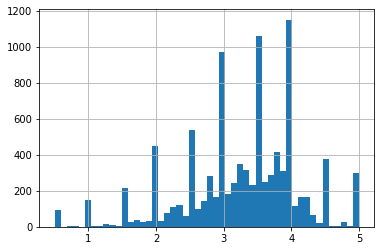

In [436]:
ratings['rating'].hist(bins=50)

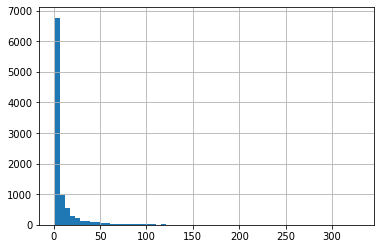

In [437]:
ratings['number_of_ratings'].hist(bins=60)

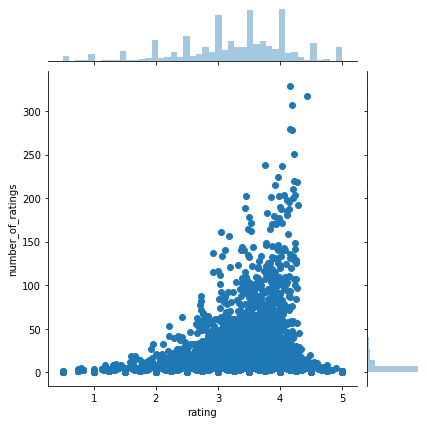

In [438]:
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)


In [439]:
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [440]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)


,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [441]:
AFO_user_rating = movie_matrix['Toy Story (1995)']
contact_user_rating = movie_matrix['Contact (1997)']

In [442]:
AFO_user_rating.tail()
#contact_user_rating.head()

userId
606    2.5
607    4.0
608    2.5
609    3.0
610    5.0
Name: Toy Story (1995), dtype: float64

In [443]:
similar_to_air_force_one=movie_matrix.corrwith(AFO_user_rating)


In [444]:
similar_to_air_force_one.head()


title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [445]:
similar_to_contact = movie_matrix.corrwith(contact_user_rating)
similar_to_contact.head()

title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [446]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation'])
corr_AFO.dropna(inplace=True)
corr_AFO.head()

,correlation
title,
"'burbs, The (1989)",0.240563
(500) Days of Summer (2009),0.353833
*batteries not included (1987),-0.427425
10 Cent Pistol (2015),1.000000
10 Cloverfield Lane (2016),-0.285732


In [447]:
corr_AFO = corr_AFO.join(ratings['number_of_ratings'])
corr_contact = corr_contact.join(ratings['number_of_ratings'])
corr_AFO .head()
corr_contact.head()
corr_AFO[corr_AFO['number_of_ratings'] > 50].sort_values(by='correlation', ascending=False).head(10)
##corr_contact[corr_contact['number_of_ratings'] > 50].sort_values(by='Correlation', ascending=False).head(10)

,correlation,number_of_ratings
title,,
Toy Story (1995),1.000000,215
Toy Story 2 (1999),0.699211,97
Arachnophobia (1990),0.652424,53
"Incredibles, The (2004)",0.643301,125
Finding Nemo (2003),0.618701,141
Aladdin (1992),0.611892,183
Erin Brockovich (2000),0.598016,70
Wallace & Gromit: The Wrong Trousers (1993),0.589625,56
Blazing Saddles (1974),0.585892,62


In [448]:
#Usando a biblioteca surprise

In [449]:
reader = Reader()
df = df.drop(['title', 'genres'], axis=1)
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,5,1,4.0,847434962
2,7,1,4.5,1106635946
3,15,1,2.5,1510577970
4,17,1,4.5,1305696483


In [450]:
benchmark = []
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

    pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')   

In [451]:
#Vamos usar o segundo melhor algoritmo que foi o BaseLine que teve um erro muito baixo

In [452]:
kf = KFold(n_splits=5)
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

In [453]:
base_line = BaselineOnly()

In [454]:
#Faz o treinamento e faz a predoição usando rmse e fcp
for trainset, testset in kf.split(data):
    base_line.fit(trainset)
    predictions = base_line.test(testset)
    accuracy.rmse(predictions, verbose=True)
    accuracy.fcp(predictions, verbose=True)

Estimating biases using als...
RMSE: 0.8728
FCP:  0.6712
Estimating biases using als...
RMSE: 0.8808
FCP:  0.6698
Estimating biases using als...
RMSE: 0.8743
FCP:  0.6765
Estimating biases using als...
RMSE: 0.8702
FCP:  0.6759
Estimating biases using als...
RMSE: 0.8649
FCP:  0.6734


In [455]:
df[df['userId']==1].head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
215,1,3,4.0,964981247
267,1,6,4.0,964982224
369,1,47,5.0,964983815
572,1,50,5.0,964982931


In [456]:
#Testa com o usuario de id 1

In [457]:
base_line.predict(1,277)

Prediction(uid=1, iid=277, r_ui=None, est=4.017059215904071, details={'was_impossible': False})

In [458]:
#Testa com o usuario 1
movie_titles['estimation'] = movie_titles['movieId'].apply(lambda x: base_line.predict(1, x).est)

In [459]:
movie_titles.sort_values('estimation', ascending=False)
#Tabela  de estimativa do usuário 1

,movieId,title,genres,estimation
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,5.000000
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.953336
906,1204,Lawrence of Arabia (1962),Adventure|Drama|War,4.941753
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.938156
909,1208,Apocalypse Now (1979),Action|Drama|War,4.928668
...,...,...,...,...
2042,2720,Inspector Gadget (1999),Action|Adventure|Children|Comedy,3.220788
1312,1760,Spice World (1997),Comedy,3.219149
1373,1882,Godzilla (1998),Action|Sci-Fi|Thriller,3.204039
2029,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,3.200155


In [460]:
#Testa com o usuario 2
movie_titles['estimation'] = movie_titles['movieId'].apply(lambda x: base_line.predict(5, x).est)
movie_titles.sort_values('estimation', ascending=False).head(10)

,movieId,title,genres,estimation
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.264337
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.174703
906,1204,Lawrence of Arabia (1962),Adventure|Drama|War,4.163119
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.159523
909,1208,Apocalypse Now (1979),Action|Drama|War,4.150035
659,858,"Godfather, The (1972)",Crime|Drama,4.144727
922,1221,"Godfather: Part II, The (1974)",Crime|Drama,4.135205
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,4.123173
6315,48516,"Departed, The (2006)",Crime|Drama|Thriller,4.118464
828,1089,Reservoir Dogs (1992),Crime|Mystery|Thriller,4.112048


In [461]:
movie_titles.sort_values('estimation', ascending=False).tail(10)

,movieId,title,genres,estimation
1743,2338,I Still Know What You Did Last Summer (1998),Horror|Mystery|Thriller,2.495445
1174,1562,Batman & Robin (1997),Action|Adventure|Fantasy|Thriller,2.481424
5270,8666,Catwoman (2004),Action|Crime|Fantasy,2.479387
3804,5323,Jason X (2002),Horror|Sci-Fi|Thriller,2.471899
1145,1499,Anaconda (1997),Action|Adventure|Thriller,2.447842
2042,2720,Inspector Gadget (1999),Action|Adventure|Children|Comedy,2.442155
1312,1760,Spice World (1997),Comedy,2.440516
1373,1882,Godzilla (1998),Action|Sci-Fi|Thriller,2.425406
2029,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,2.421522
1173,1556,Speed 2: Cruise Control (1997),Action|Romance|Thriller,2.394347


In [462]:
unique_ids = df.userId.unique()
size_of_users = unique_ids.shape

In [463]:
#filmes top
top_filmes = [318, 858, 904, 1208, 750]
movie_array = []
movies_estimation = []

for index, j in enumerate(top_filmes):
    media = 0
    for i in unique_ids:
        media += base_line.predict(i, j).est
    movie_array.append(media/size_of_users)
    
for i in movie_array:
    movies_estimation.append(i[0])

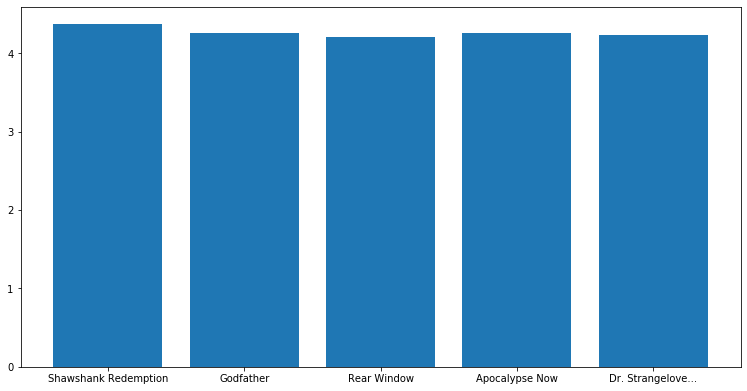

In [464]:
labels = ('Shawshank Redemption', 'Godfather', 'Rear Window', 'Apocalypse Now', 'Dr. Strangelove...')
sizes = movies_estimation

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, sizes)
plt.show()

In [465]:
#filmes tail
tail_movies = [374, 1556, 1499, 3593, 5323]
movie_array = []
movies_estimation = []

for index, j in enumerate(tail_movies):
    media = 0
    for i in unique_ids:
        media += base_line.predict(i, j).est
    movie_array.append(media/size_of_users)
    
for i in movie_array:
    movies_estimation.append(i[0])

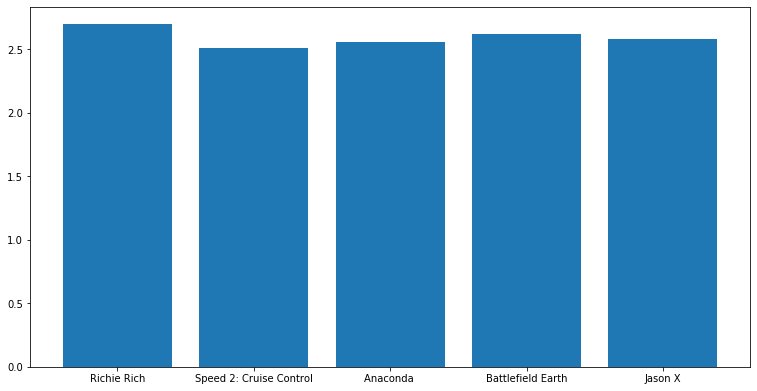

In [466]:
labels = ('Richie Rich', 'Speed 2: Cruise Control', 'Anaconda ', 'Battlefield Earth', 'Jason X')
sizes = movies_estimation

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, sizes)
plt.show()